# HW03
In this assignment, you will learn how to visualize data using matplotlib and seaborn <br>
and high-dimensional data using t-SNE.

Please follow the instructions below:

1. Write down your code between <br>
&nbsp;&nbsp;&nbsp;&nbsp; **\# BEGIN_YOUR_CODE**<br>
&nbsp;&nbsp;&nbsp;&nbsp; and<br>
&nbsp;&nbsp;&nbsp;&nbsp; **\# END_YOUR_CODE**.

2. Do not use **external libraries**. (i.e., Do not use any `import` in your code) <br>
   Your code will fail to execute and get **0 score** if you use them.

3. Rename this file to **[student_id].ipynb** (e.g. 20221234.ipynb) and submit it to PLMS. <br>
   There is **20% penalty** if you do not follow the submission format.

4. Submission more than one day late is not accepted.
   There is **50% penalty** for late submission up to one day.

In [92]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

np.random.seed(42)

## Problem 1. Matplotlib [15 points]
For this problem, only `matplotlib` is allowed to be used. <br>
Do not use `seaborn` or any other kind of visualization library.

### a. Basic Plot [3 points]
Draw $y = x^2 - 3$ and $y = 3 - x^2$ graphs on one plot. <br>
Check for detailed properties below:

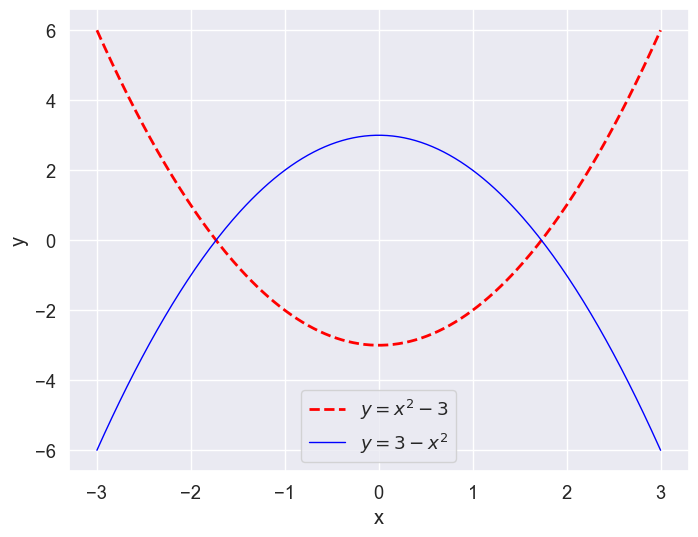

In [94]:
'''
    Draw y = x^2 - 3 and y = 3 - x^2 graphs on one plot.
    For each graph, add legend describing it at the bottom of the center.

    The properties of the whole figure are as follow:
        |x_label| - 'x'
        |y_label| - 'y'

    The properties of each graph are as follow:

        y = x^2 - 3
            |color|     - red
            |linewidth| - 2
            |linestyle| - dashed
            |legend|    - r'y = x^2 - 3'
        
        y = 3 - x^2
            |color|     - blue
            |linewidth| - 1
            |linestyle| - solid
            |legend|    - r'y = 3 - x^2'
'''

'''
from importlib import reload
plt=reload(plt)
'''


x = np.linspace(-3, 3, 300)

# BEGIN_YOUR_CODE
y1 = x**2 - 3
y2 = 3 - x**2 

plt.figure(figsize = (8,6))
plt.plot(x, y1, color = 'red', linewidth = 2, linestyle = '--', label = r'$y = x^2 - 3$')
plt.plot(x, y2, color = 'blue', linewidth = 1, linestyle = '-', label = r'$y = 3 - x^2$')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()

# END_YOUR_CODE

### b. Subplot [3 points]
Draw $y = sin(x)$, $y = cos(x)$, and $y = tan(x)$ graphs on three subplots with one row and three columns. <br>
Draw $y = sin(x)$ on the left, $y = cos(x)$ on the middle, and $y = tan(x)$ on the right. <br>
Check for detailed properties below:

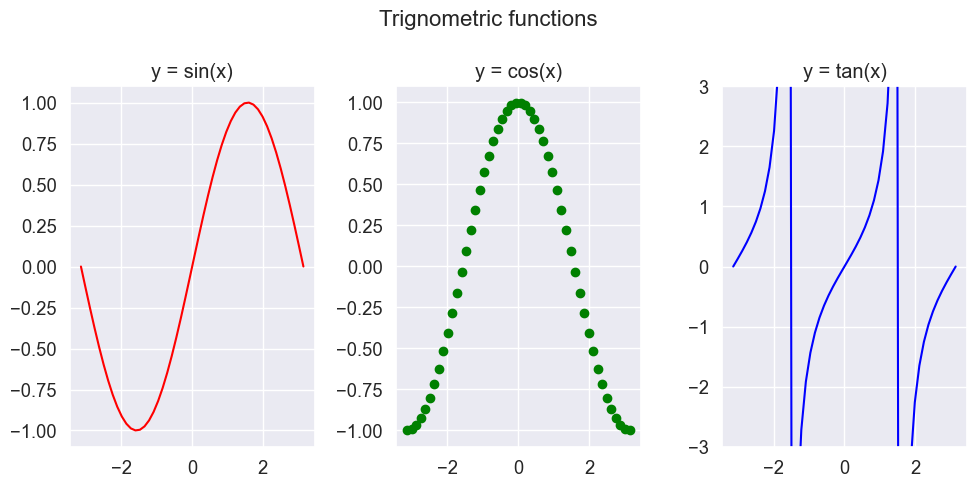

In [95]:
'''
    Draw y = sin(x), y = cos(x), and y = tan(x) graphs on three subplots with one row and three columns.
    On the left side, draw y = sin(x) as a normal plot.
    On the middle side, draw y = cos(x) as a scatter plot.
    On the right side, draw y = tan(x) as a normal plot.

    The properties of the whole figure are as follow:
        |size|  - (10, 5)
        |title| - 'Trigonometric functions'

    The properties of each graph are as follow:

        y = sin(x)
            |title|   - 'y = sin(x)'
            |color|   - red
        
        y = cos(x)
            |title|   - 'y = cos(x)'
            |color|   - green
        
        y = tan(x)
            |title|   - 'y = tan(x)'
            |color|   - blue
            |y_range| - [-3, 3]
'''

x = np.linspace(-np.pi, np.pi, 50)

# BEGIN_YOUR_CODE
sin = np.sin(x)
cos = np.cos(x)
tan = np.tan(x)

plt.figure(figsize = (10,5))
plt.suptitle('Trignometric functions', fontsize = 16)

plt.subplot(131)
plt.plot(x,sin,color = 'red')
plt.title ('y = sin(x)')

plt.subplot(132) 
plt.scatter(x, cos, color = 'green')
plt.title('y = cos(x)')

plt.subplot(133) 
plt.plot(x, tan, color = 'blue')
plt.title('y = tan(x)')
plt.ylim(-3,3)

plt.tight_layout()

plt.show() 


# END_YOUR_CODE

### c. Histogram [4 points]
Draw $\mathcal{N}(0, 1)$ graph and histogram of normally sampled values on one plot. <br>
Check for detailed properties below:

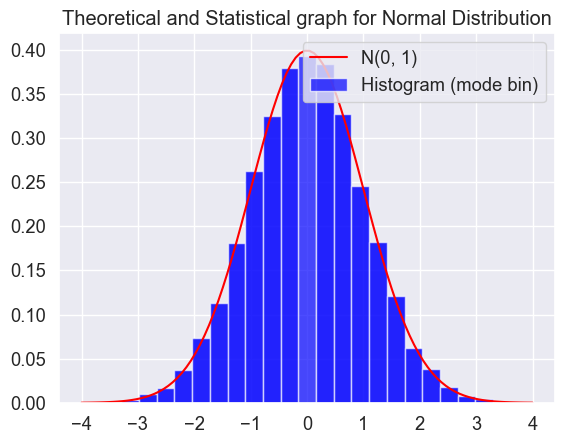

In [77]:
'''
    Draw N(0, 1) graph and histogram of normally sampled values on one plot.

    The properties of the whole figure are as follow:
        |title| - 'Theoretical and Statistical graph for Normal Distribution'

    The properties of each graph are as follow:
        
        N(0, 1) graph
            |color|     - red
        
        histogram
            # of |bin|  - 25 (each bin should have the same width)
            |color|     - blue
            |alpha|     - 0.7 (for mode bin) / 0.5 (otherwise)
'''

x = np.linspace(-4, 4, 100)

rv = scipy.stats.norm()
theo = rv.pdf(x)

num_sample = 10000
stat = np.random.normal(0, 1, num_sample)

# BEGIN_YOUR_CODE

fig, ax = plt.subplots()

ax.plot(x, theo, color='red', label='N(0, 1)')

ax.set_title('Theoretical and Statistical graph for Normal Distribution')


hist, bin_edges = np.histogram(stat, bins=25, density=True) 
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

ax.bar(bin_centers, hist, width=(bin_centers[1] - bin_centers[0]), color='blue', alpha=0.7, label='Histogram (mode bin)')

for i in range(25):
    if i == np.argmax(hist):
        continue
    ax.bar(bin_centers[i], hist[i], width=(bin_centers[1] - bin_centers[0]), color='blue', alpha=0.5)
    
ax.legend()
plt.show()

# END_YOUR_CODE

### d. Qunatile Plot [2 points]
Draw 20-quantile (i.e., vigiciles) plot of $U(-3, 3)$. <br>
Check for detailed properties below:

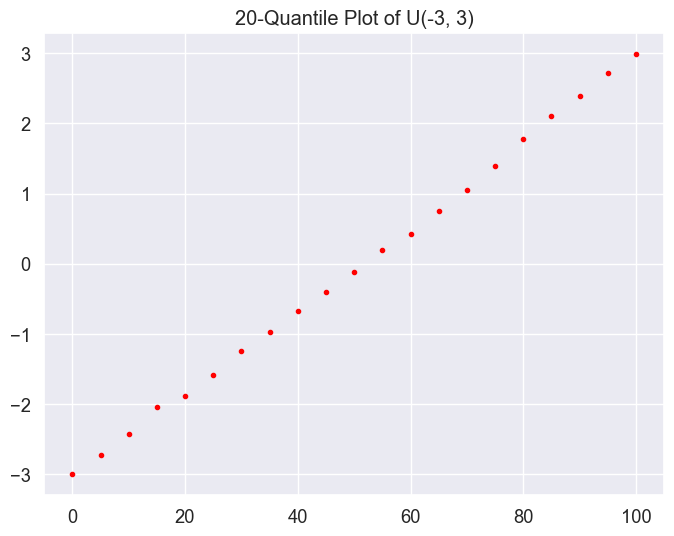

In [78]:
'''
    Draw 20-quantile (i.e., vigiciles) plot of U(-3, 3).

    The properties of each graph are as follow:
        
        quantile plot
            quantile - 20
            |color|  - red
            |marker| - point
'''

a = np.random.uniform(-3, 3, size=1000)
q = np.linspace(0, 100, 21)

# BEGIN_YOUR_CODE

quantile = np.percentile(a, q)
plt.figure(figsize = (8,6))
plt.plot(q, quantile, color = 'red', marker = '.', linestyle= '', markersize = 6)

plt.title('20-Quantile Plot of U(-3, 3)')

plt.show()

# END_YOUR_CODE

### e. Q-Q Plot [3 points]
Draw Q-Q plot comparing $U(-3, 3)$ and $\mathcal{N}(0, 1)$. <br>
Use 20-quantile (i.e., vigiciles) for both distributions. <br>
Also draw a guiding line, $y = x$ graph. <br>
Check for detailed properties below:

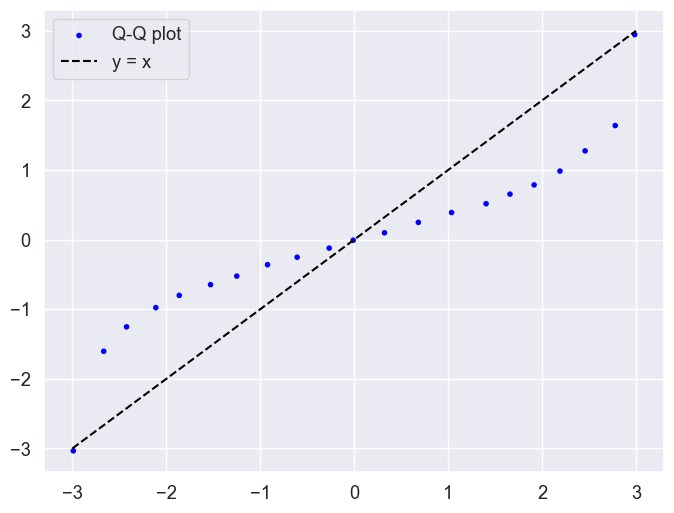

In [79]:
'''
    Draw Q-Q plot comparing U(-3, 3) and N(0, 1).
    Use 20-quantile (i.e., vigiciles) for both distributions.
    Also draw a guiding line, y = x graph.

    The properties of the whole figure are as follow:
        |x_label| - 'Uniform(-3, 3)'
        |y_label| - 'Normal(0, 1)'

    The properties of each graph are as follow:
        
        Q-Q plot
            quantile - 20 (for both)
            |color|     - blue
            |linestyle| - no line (use linestyle='')
            |marker|    - point
            
        
        y = x
            |color|     - black
            |linestyle| - dashed
            
'''

a = np.random.uniform(-3, 3, size=1000)
b = np.random.normal(0, 1, size=1000)
q = np.linspace(0, 100, 21)

x = np.linspace(-3, 3, 100)

# BEGIN_YOUR_CODE

a_quantile = np.percentile(a,q) 
b_quantile = np.percentile(b,q)

plt.figure(figsize = (8,6))
plt.scatter(a_quantile, b_quantile, color = 'blue', marker = '.', linestyle = '', label = 'Q-Q plot')

plt.plot([-3,3], [-3,3], color = 'black', linestyle = '--', label = 'y = x')

plt.xlabel = ('Uniform (-3, 3) Quantiles')
plt.ylabel = ('Normal(0,1) Quantiles')
plt.legend() 

plt.show() 

# END_YOUR_CODE

## Problem 2. Seaborn [6 points]
For this problem, only `seaborn` is allowed to be used. <br>
Do not use `matplotlib` or any other kind of visualization library.

### Load Dataset [0 points]
`titanic` dataset is used for this problem.

In [97]:
'''
    Data types and descriptions of columns in dataset |titanic| are as follow:
        |alive|    -> str : Survival
        |class|    -> str : Ticket class
        |sex|      -> str : Sex (male, female)
        |age|      -> int : Age in years (0 - 80)
        |fare|     -> int : Passenger fare (0 - 512)
        |embarked| -> str : Port of Embarkation (C: Cherbourg, Q: Queenstown, S: Southampton)
'''

columns = ['alive', 'class', 'sex', 'age', 'fare', 'embarked']
data = sns.load_dataset('titanic').dropna().reset_index(drop=True)[columns]
data['age'] = data['age'].apply(int)
data['fare'] = data['fare'].apply(int)
data



,alive,class,sex,age,fare,embarked
0,yes,First,female,38,71,C
1,yes,First,female,35,53,S
2,no,First,male,54,51,S
3,yes,Third,female,4,16,S
4,yes,First,female,58,26,S
...,...,...,...,...,...,...
177,yes,First,female,47,52,S
178,no,First,male,33,5,S
179,yes,First,female,56,83,C
180,yes,First,female,19,30,S


### a. Box plot [1 points]
Draw a box plot comparing the `age` distribution of each `alive`.

<Axes: xlabel='alive', ylabel='age'>

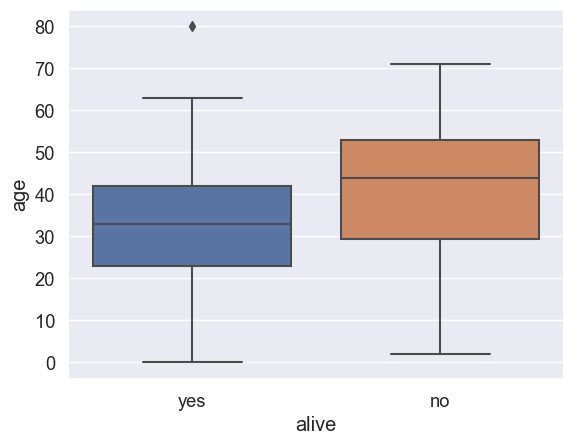

In [81]:
'''
    Draw a box plot comparing the age distribution of each alive.
'''

# BEGIN_YOUR_CODE

sns.boxplot(x='alive', y='age', data=data) 

# END_YOUR_CODE

### b. Bar plot [1 points]
Draw a bar plot comparing the `age` distribution of each `class`. <br>
For each `class`, show `age` distribution for each `alive`.

<Axes: xlabel='class', ylabel='age'>

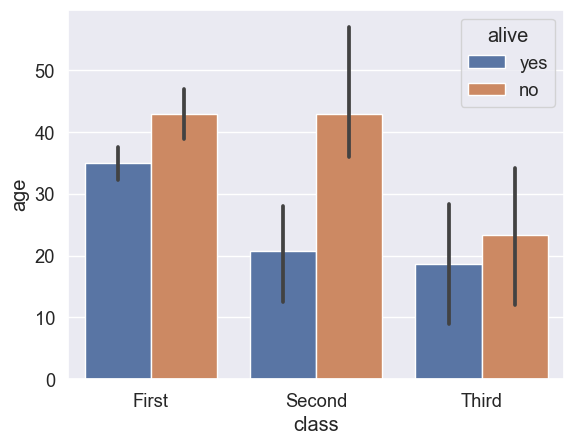

In [82]:
'''
    Draw a bar plot comparing the age distribution of each class.
    For each class, show age distribution for each alive.
'''

# BEGIN_YOUR_CODE

sns.barplot(x='class', y='age', hue= 'alive', data=data)

# END_YOUR_CODE

### c. Histogram and KDE (Kernel Density Estimation) [1 points]
Draw a histogram and KDE for `fare`.

<Axes: xlabel='fare', ylabel='Count'>

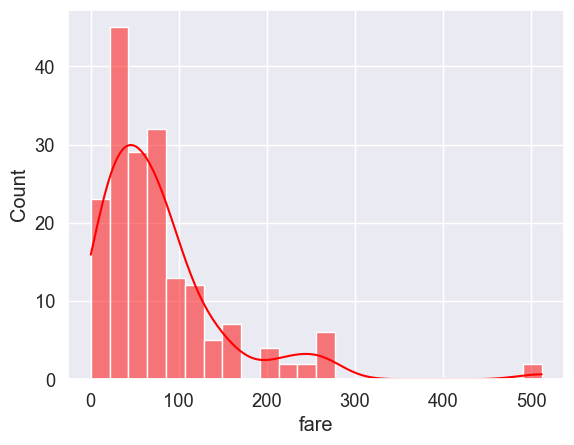

In [83]:
'''
    Draw a histogram and KDE for fare
'''

# BEGIN_YOUR_CODE

sns.histplot(data['fare'], kde= True, color='red')

# END_YOUR_CODE

### d. Joint plot [1 points]
Draw a joint plot between `age` and `fare`.

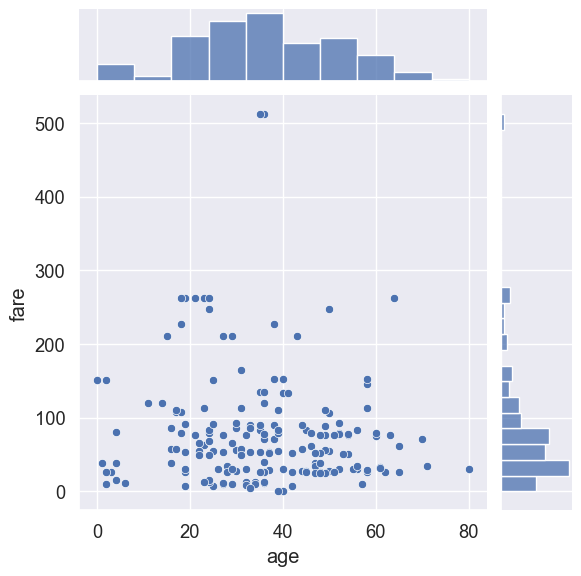

In [84]:
'''
    Draw a joint plot between age and fare.
'''

# BEGIN_YOUR_CODE

sns.jointplot(x='age', y='fare', data=data, kind='scatter')

# END_YOUR_CODE

### e. Heatmap [2 points]
Draw a heatmap between `class` and `embarked` where values are `age`.

<Axes: xlabel='embarked', ylabel='class'>

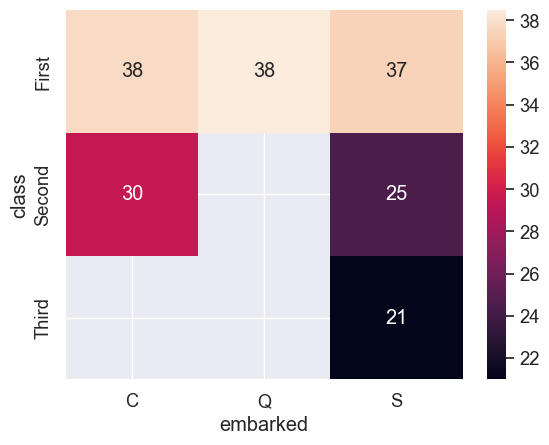

In [101]:
'''
    Draw a heatmap between class and embarked where values are age.
'''

# BEGIN_YOUR_CODE

heatmap_data = data.pivot_table(index='class', columns='embarked', values='age', aggfunc='mean')

sns.heatmap(heatmap_data, annot=True)

# END_YOUR_CODE

## Problem 3. t-SNE [4 points]

### Load Dataset [0 points]
`iris` dataset is used for this problem.

In [102]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
X, y = data['data'], data['target']
X, y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

### a. Dimensionality Reduction [2 points]
Reduce dimension of each data in `X` into 2. <br>
Set column names of transformed `X`, `X_tnse`, as `component_0` and `component_1`.

In [103]:
'''
    Reduce dimension of each data in |X| into 2.
    Set column names of transformed |X|, |X_tnse|, as |component_0| and |component_1|.
    Note that |X_tnse| should still be pandas dataframe.
'''

# BEGIN_YOUR_CODE

data = load_iris(as_frame=True)
X, y = data['data'], data['target']

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

X_tnse = pd.DataFrame(data=X_tsne, columns=['component_0', 'component_1'])

# END_YOUR_CODE

X_tnse #tSNE 를 사용하는데 이름을 tnse 로 한 이유가 따로 있나요? 

,component_0,component_1
0,-23.875437,-1.430589
1,-21.332832,-2.522965
2,-21.183956,-1.316485
3,-20.842545,-1.611920
4,-23.845785,-0.945733
...,...,...
145,15.408048,-1.407380
146,12.035444,-1.459038
147,14.410233,-1.398059
148,15.347630,-3.389599


### b. Visualization [2 points]
Visualize `X_tnse` for each `y` on one plot using `matplotlib`. <br>
Check for detailed properties below:

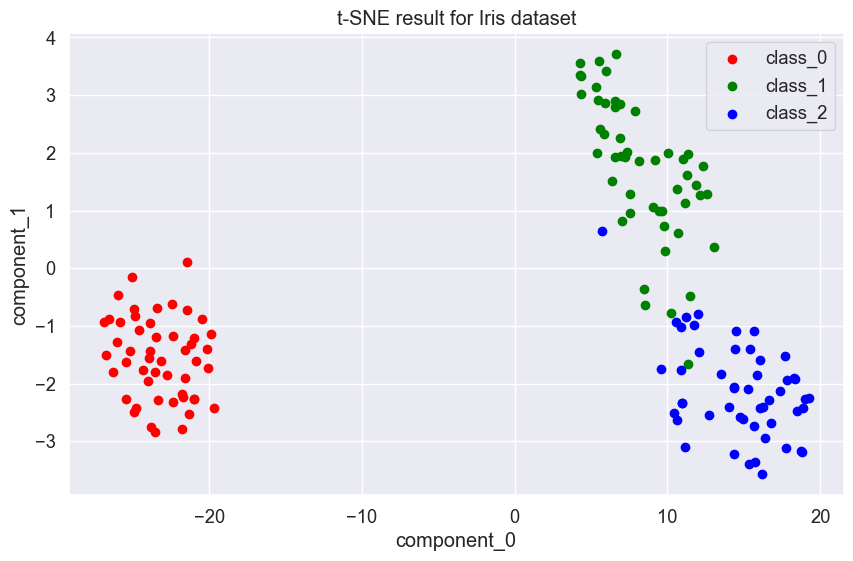

In [105]:
'''
    Visualize |X_tnse| for each |y| on one plot.
    That is, draw one scatter plot for each |y| value.
    For each graph, add legend describing it.

    The properties of the whole figure are as follow:
        |title|   - 't-SNE result for Iris dataset'
        |x_label| - 'component_0'
        |y_label| - 'component_1'

    The properties of each graph are as follow:

        y = 0
            |color|  - 'red'
            |legend| - 'class_0'

        y = 1
            |color|  - 'green'
            |legend| - 'class_1'

        y = 2
            |color|  - 'blue'
            |legend| - 'class_2'
'''

# BEGIN_YOUR_CODE

class_colors = ['red', 'green', 'blue']
class_legends = ['class_0', 'class_1', 'class_2']


plt.figure(figsize=(10, 6))
plt.title('t-SNE result for Iris dataset')
plt.xlabel('component_0')
plt.ylabel('component_1')

for class_label, color, legend in zip([0, 1, 2], class_colors, class_legends):
    indices = (y == class_label)
    plt.scatter(X_tnse[indices]['component_0'], X_tnse[indices]['component_1'], c=color, label=legend)

plt.legend()
plt.show()

# END_YOUR_CODE